# Marketing Campaign Analysis
In this notebook we carry out a Marketing Campaign Analysis from a store in Brazil, addressing the main factors that are responsible for users to positively respond to a marketing campaign. As a result, we are able to evaluate manners to improve marketing efficiency.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='white')

In [ ]:
path = 'dataset.csv'

df = pd.read_csv(path)
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


## Translation
We translate our dataframe to English to broaden our audience.

In [3]:
cols = [
    'ID', 'year_birth', 'education', 'marital_status', 'income',
    'kids_home', 'teens_home', 'sign_up_date', 'wine_expenditure',
    'fruit_expenditure', 'meat_expenditure', 'fish_expenditure',
    'candy_expenditure', 'others_expenditure', 'promotional_purchases',
    'online_purchases', 'catalog_purchases', 'store_purchases',
    'online_visits_month',
    'response_cmpgn_1', 'response_cmpgn_2', 'response_cmpgn_3',
    'response_cmpgn_4', 'response_cmpgn_5', 'response_cmpgn_6'
]

df.columns = cols
df

,ID,year_birth,education,marital_status,income,kids_home,teens_home,sign_up_date,wine_expenditure,fruit_expenditure,...,online_purchases,catalog_purchases,store_purchases,online_visits_month,response_cmpgn_1,response_cmpgn_2,response_cmpgn_3,response_cmpgn_4,response_cmpgn_5,response_cmpgn_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,5922,1974,PhD,Casado,"$40,344.00",0,1,10/13/13,210,0,...,4,1,5,7,0,0,0,0,0,0
2233,7250,1978,Graduação,Casado,"$57,867.00",1,0,2010-01-13,344,35,...,7,2,9,6,0,0,0,0,0,0
2234,2478,1973,Graduação,Casado,"$25,410.00",1,0,8/31/13,2,2,...,1,0,4,4,0,0,0,0,0,0
2235,1160,1970,Graduação,Casado,"$13,260.00",1,1,8/23/13,9,4,...,3,0,3,8,0,0,0,0,0,0


In [4]:
df['education'] = df['education'].map({
    'Ensino Fundamental': 'elementary_school',
    'Ensino Médio': 'high_school',
    'Graduação': 'undergraduate',
    'Mestrado': 'master',
    'PhD': 'PhD'
})

df['marital_status'] = df['marital_status'].map({
    'Solteiro': 'single',
    'Casado': 'married',
    'Divorciado': 'divorced',
    'Viúvo': 'widowed'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     2237 non-null   int64 
 1   year_birth             2237 non-null   int64 
 2   education              2237 non-null   object
 3   marital_status         2237 non-null   object
 4   income                 2213 non-null   object
 5   kids_home              2237 non-null   int64 
 6   teens_home             2237 non-null   int64 
 7   sign_up_date           2237 non-null   object
 8   wine_expenditure       2237 non-null   int64 
 9   fruit_expenditure      2237 non-null   int64 
 10  meat_expenditure       2237 non-null   int64 
 11  fish_expenditure       2237 non-null   int64 
 12  candy_expenditure      2237 non-null   int64 
 13  others_expenditure     2237 non-null   int64 
 14  promotional_purchases  2237 non-null   int64 
 15  online_purchases     

## EDA
We first perform an exploratory analysis to understand our data, make sure they are in the correct data type, and solve any issues, such as outliers and missing values.

### Response Campaigns
Since our main goal is to understand the response campaigns, we start by consolidating their information. As we have data about six different campaigns, we can consolidate them into a `response` variable, concerning whether a customer has positively engaged in any campaign. Consequently, we observe that only 27% of our customers have accepted one.

In [5]:
response = [
    'response_cmpgn_1', 'response_cmpgn_2', 'response_cmpgn_3',
    'response_cmpgn_4', 'response_cmpgn_5', 'response_cmpgn_6'
]


df['response'] = df[response].any(axis=1).astype(int)

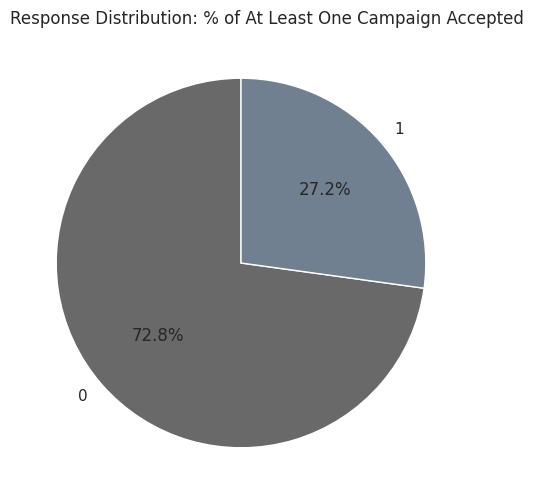

In [ ]:
plt.figure(figsize=(12, 6))
df['response'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['dimgrey', 'slategrey']
)
plt.title('Response Distribution: % of At Least One Campaign Accepted', loc='left', fontsize=12)
plt.ylabel('');

And, by looking at them individually, we observe Campaign 6 to be the most succesful.

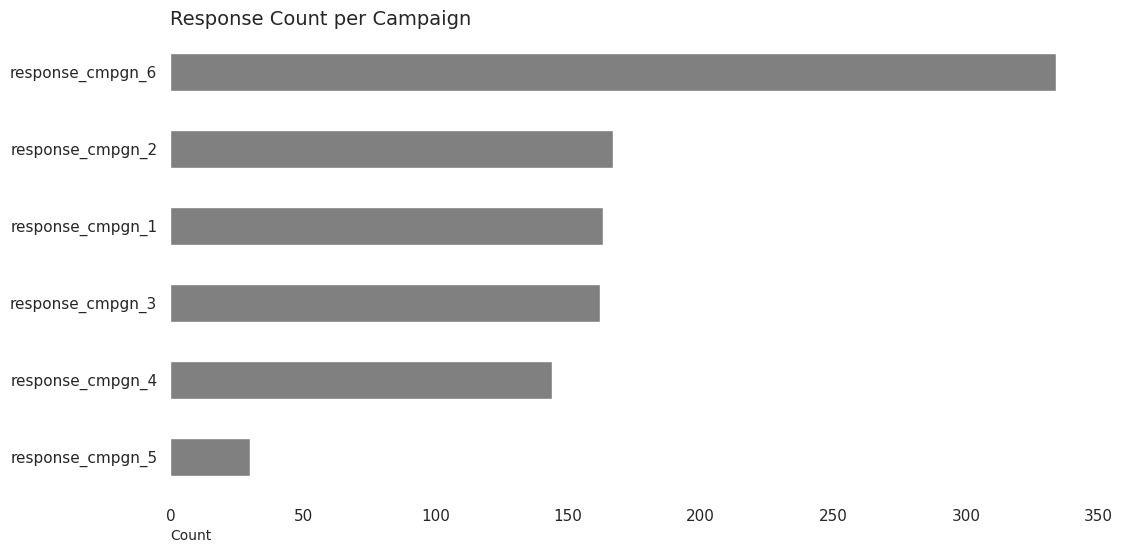

In [35]:
aux = df[response].sum(axis=0).copy()
aux = aux.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
aux.plot.barh(color='grey')
plt.box(False)
plt.title('Response Count per Campaign', loc='left', fontsize=14)
plt.xlabel('Count', loc='left', fontsize=10)
plt.ylabel('', fontsize=10);

By looking at the cumulative distribution for the number of accepted campaigns, we have roughly 10% of users positively responding to two or more campaigns and 16% of users that accepted one.

In [6]:
df['n_response'] = df[response].sum(axis=1)

In [27]:
s = df['n_response'].copy()
s.groupby(s).count() / len(s)

n_response
0    0.728086
1    0.165027
2    0.063506
3    0.022809
4    0.016100
5    0.004472
Name: n_response, dtype: float64

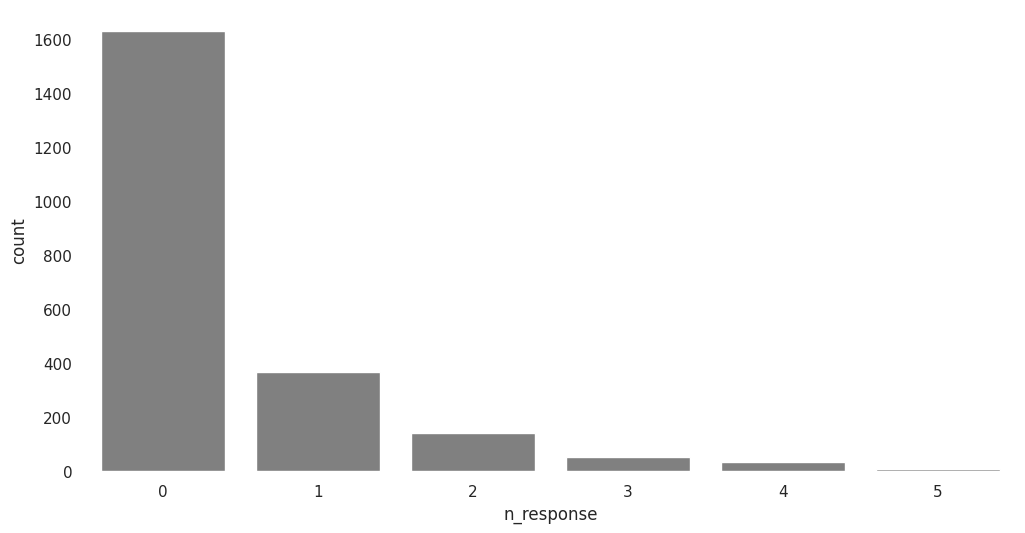

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='n_response',
    color='grey'
)
plt.box(False);

### Income
Variable is in string format, displayed with BRL currency. We hence remove unecessary characters and convert it to `float`.

In [7]:
df['income'] = df['income']\
    .str.replace('$', '')\
    .str.replace(',', '')\
    .astype(float)

By looking at its distribution, we observe very high income values, representing outliers. Particularly, only the highest seems to represent a distortion of reality and will be dropped. In fact, the usual procedure is to consider $s = 1.5$, but to remove only the highest is equivalent to drop all outliers with $s = 3$. We choose to maintain the remaining values since they may indicate very high income behavior.

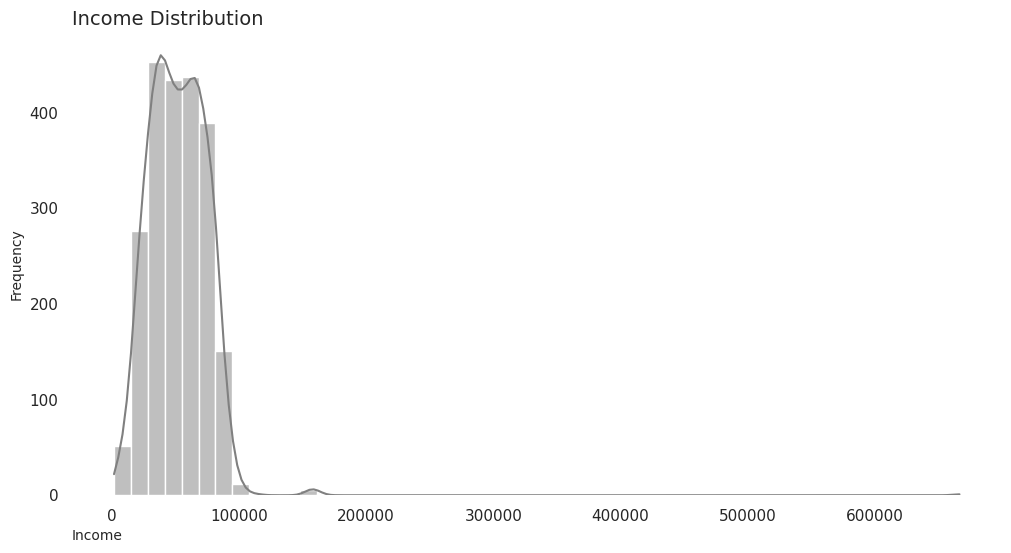

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='income',
    bins=50,
    kde=True,
    color='grey'
)
plt.box(False)
plt.title('Income Distribution', loc='left', fontsize=14)
plt.xlabel('Income', loc='left', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [9]:
q1 = df['income'].quantile(.25)
q3 = df['income'].quantile(.75)
iqr = q3 - q1

s = 3
l_bound = q1 - s * iqr
u_bound = q3 + s * iqr

income_outliers = (df['income'] > u_bound) | (df['income'] < l_bound)
df[income_outliers]

,ID,year_birth,education,marital_status,income,kids_home,teens_home,sign_up_date,wine_expenditure,fruit_expenditure,...,store_purchases,online_visits_month,response_cmpgn_1,response_cmpgn_2,response_cmpgn_3,response_cmpgn_4,response_cmpgn_5,response_cmpgn_6,response,n_response
526,9432,1977,undergraduate,married,666666.0,1,0,2006-02-13,9,14,...,3,6,0,0,0,0,0,0,0,0


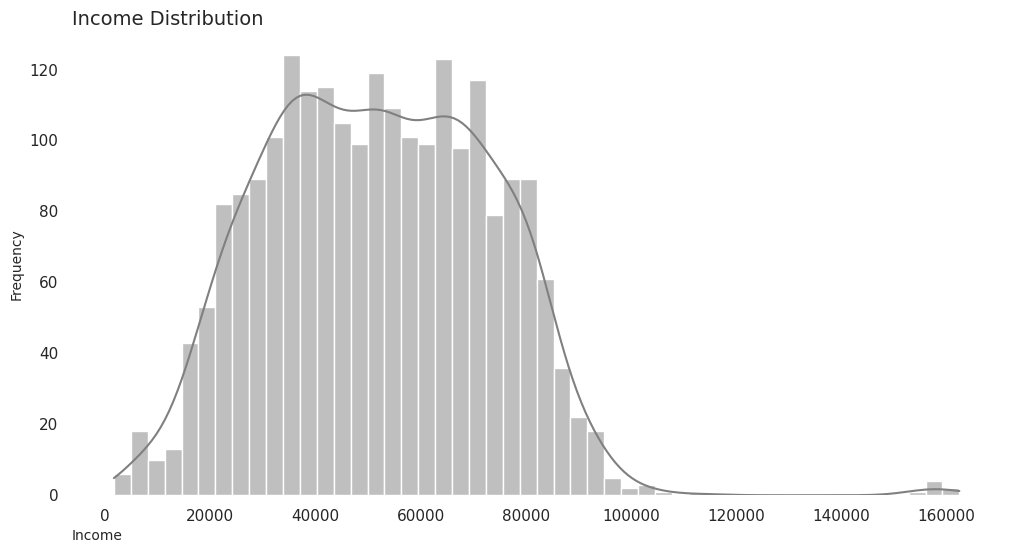

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df[~income_outliers],
    x='income',
    bins=50,
    kde=True,
    color='grey'
)
plt.box(False)
plt.title('Income Distribution', loc='left', fontsize=14)
plt.xlabel('Income', loc='left', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

We observe from the plot that there are 0.5% customers with income higher than R$ 100,000.00

In [10]:
df = df[~income_outliers]
len(df.query('income > 100000')) / len(df)

0.005366726296958855

#### Missing Values - KNN Imputer
To treat income missing values, we consider `KNNImputer` with `StandardScaler`. As the former considers Euclidean distances, we standardized the income variable first, then apply the imputation method. Afterwards, we apply the inverse transformation to return to the original scale.

In [ ]:
df.isnull().sum()

,0
ID,0
year_birth,0
education,0
marital_status,0
income,24
kids_home,0
teens_home,0
sign_up_date,0
wine_expenditure,0
fruit_expenditure,0


In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

income_scaled = scaler.fit_transform(df[['income']])
income_imputed = imputer.fit_transform(income_scaled)
df.loc[:, 'income'] = scaler.inverse_transform(income_imputed)

df.isnull().sum()

ID                       0
year_birth               0
education                0
marital_status           0
income                   0
kids_home                0
teens_home               0
sign_up_date             0
wine_expenditure         0
fruit_expenditure        0
meat_expenditure         0
fish_expenditure         0
candy_expenditure        0
others_expenditure       0
promotional_purchases    0
online_purchases         0
catalog_purchases        0
store_purchases          0
online_visits_month      0
response_cmpgn_1         0
response_cmpgn_2         0
response_cmpgn_3         0
response_cmpgn_4         0
response_cmpgn_5         0
response_cmpgn_6         0
response                 0
n_response               0
dtype: int64

#### Income Bin

Moreover, by diving it into bins, we see that most of our data is represented by customers with income from R\$ 20,000.00 to R\$ 80,000.00.

In [13]:
income_bins = [
    0, 20_000,
    40_000, 60_000,
    80_000, 200_000
]

income_labels = [
    '0-20k', '20k-40k',
    '40k-60k', '60k-80k',
    '80k+'
]

df['income_bin'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

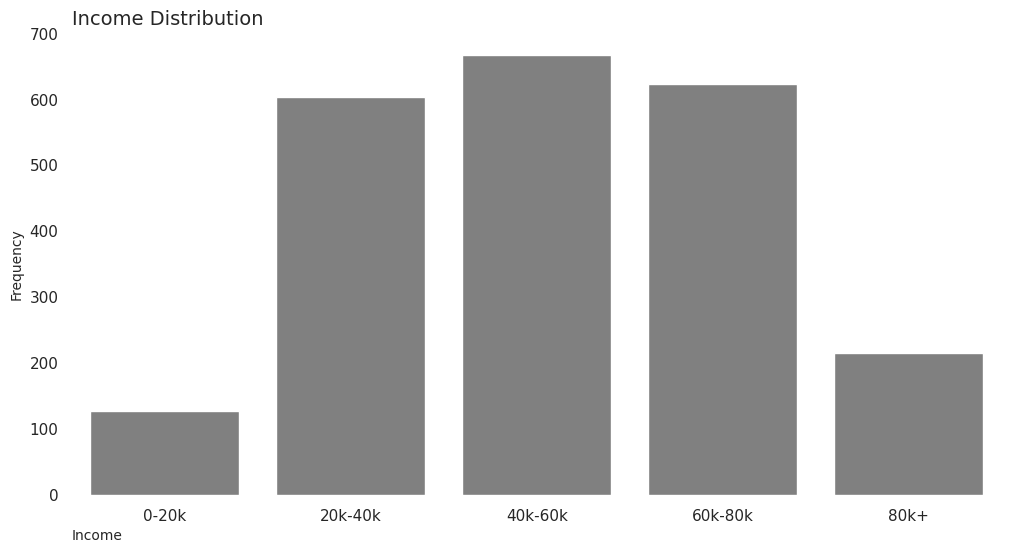

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='income_bin',
    color='grey'
)
plt.box(False)
plt.title('Income Distribution', loc='left', fontsize=14)
plt.xlabel('Income', loc='left', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show();

#### Response Campaign per Income Bin
When we segreggate the response campaign percentage per income bin we are able to see a prevalence in the highest bin, suggesting that high income customers have a higher tendency to positively respond to a campaign.

Individually, we get

- `response_cmpgn_1`: no preference
- `response_cmpgn_2`: slightly better at high incomes
- `response_cmpgn_3`: very positive response in the highest bin
- `response_cmpgn_4`: positive response in the highest bin
- `response_cmpgn_5`: bad response overall
- `response_cmpgn_6`: better response in the highest bin

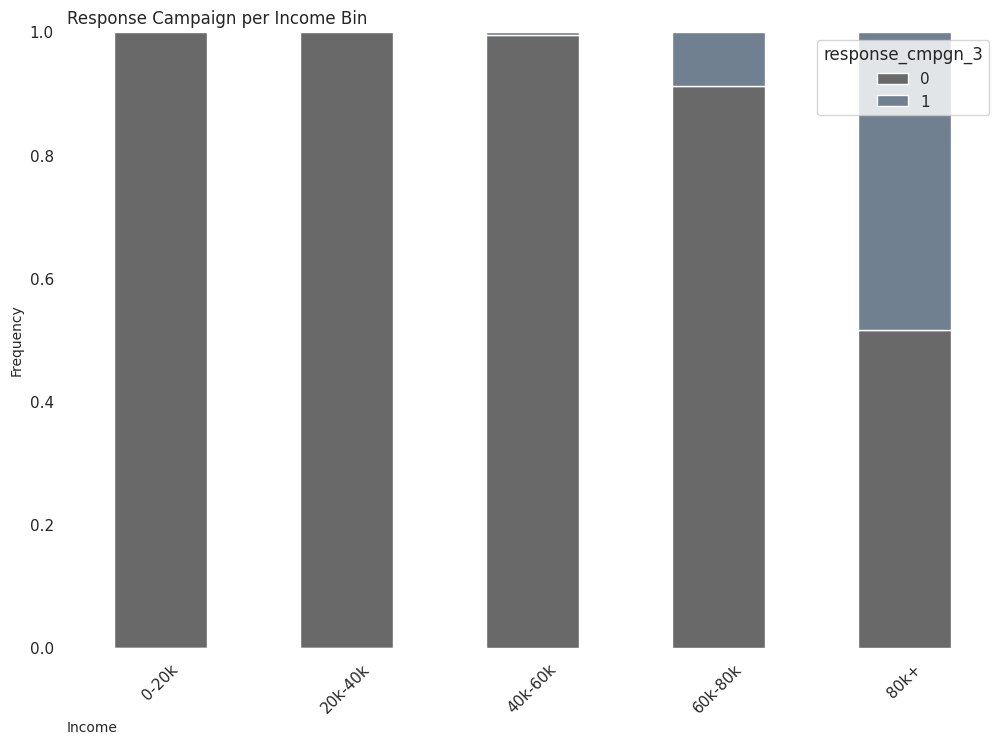

In [74]:
# response campaign per income bin
aux = df.groupby('income_bin')['response_cmpgn_3'].value_counts(normalize=True)
aux = aux.unstack()

aux.plot.bar(
    stacked=True,
    color=['dimgrey', 'slategrey'],
    figsize=(12, 8)
)
plt.box(False)
plt.ylim(0, 1)
plt.title('Response Campaign per Income Bin', loc='left', fontsize=12)
plt.xlabel('Income', loc='left', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=10);

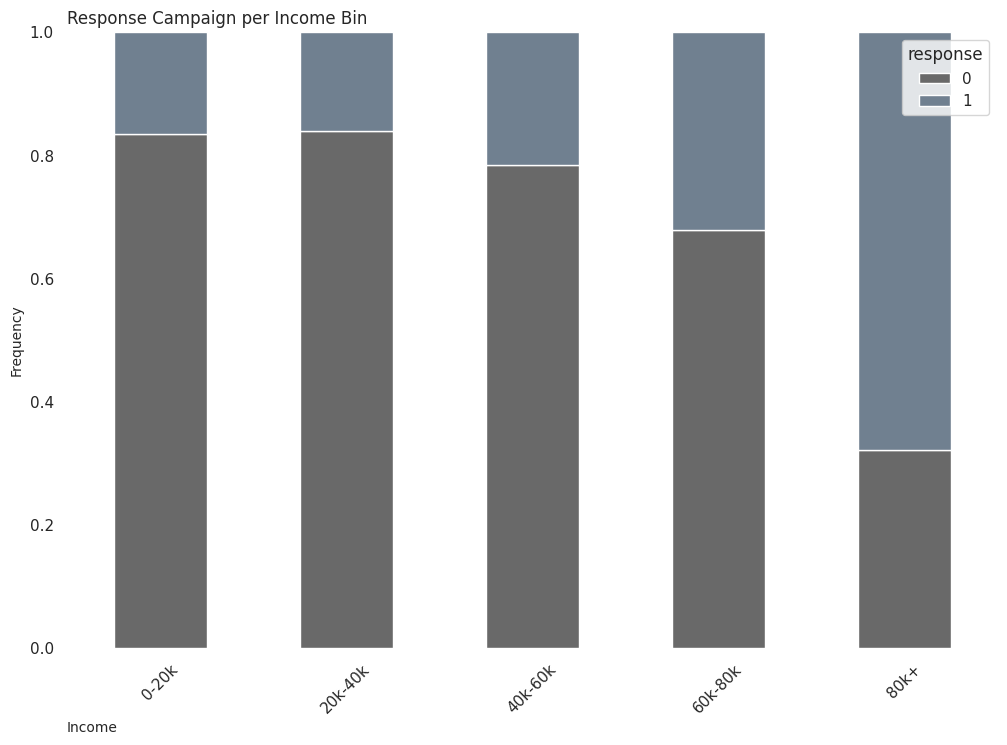

In [79]:
# response campaign per income bin
aux = df.groupby('income_bin')['response'].value_counts(normalize=True)
aux = aux.unstack()

aux.plot.bar(
    stacked=True,
    color=['dimgrey', 'slategrey'],
    figsize=(12, 8)
)
plt.box(False)
plt.ylim(0, 1)
plt.title('Response Campaign per Income Bin', loc='left', fontsize=12)
plt.xlabel('Income', loc='left', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=10);

### Expenditures
We next analyse how expenditures are related with income. It is expected to see greater expenditures with greater incomes.

In [14]:
expenditures = [
    'wine_expenditure', 'fruit_expenditure', 'meat_expenditure',
    'fish_expenditure', 'candy_expenditure', 'others_expenditure'
]

df['total_expenditure'] = df[expenditures].sum(axis=1)

df['total_expenditure'].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: total_expenditure, dtype: float64

When looking at the average expenditure per income bin, we observe the expected relation: higher averages come from higher bins. In fact, we observe that the average from the highest bin is 20 times greater than the average from the lowest bin, suggesting that, on average, a customer from the former is equivalent to 20 customers from the latter, in terms of total expenditure.

In [32]:
grp = df.groupby('income_bin')['total_expenditure'].mean().reset_index()
grp = grp.sort_values(by='income_bin', ascending=False)
grp

,income_bin,total_expenditure
4,80k+,1514.911628
3,60k-80k,1107.889246
2,40k-60k,405.445277
1,20k-40k,98.347682
0,0-20k,72.685039


From the graphic below we notice a higher tendency in accepting a campaign in regions of higher expenditures, in accordance with the fact that high income customers have higher expenditures.

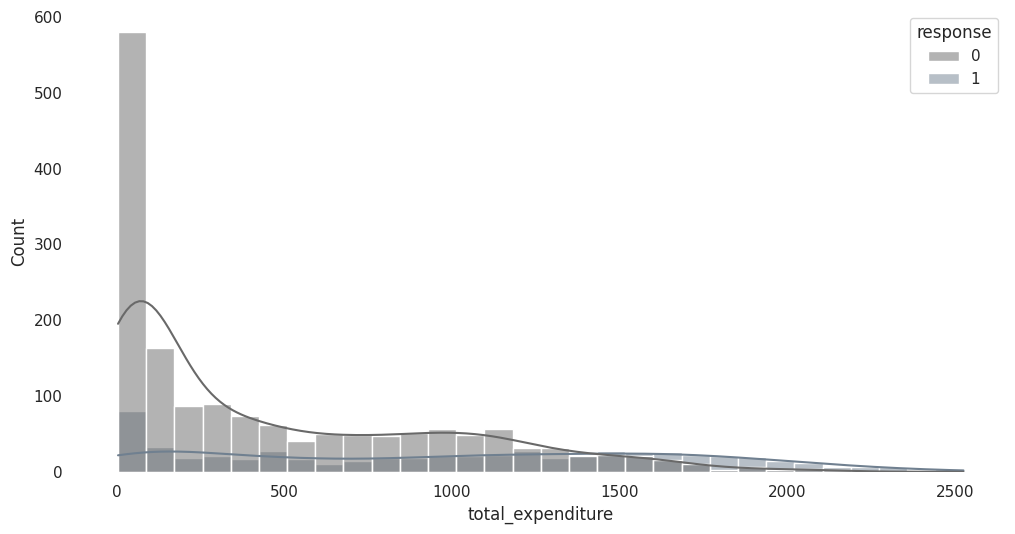

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='total_expenditure',
    bins=30,
    kde=True,
    palette=['dimgrey', 'slategrey'],
    hue='response'
)
plt.box(False)

### Purchases
Considering the sum `online_purchases`$+$ `catalog_purchases`$+$ `store_purchases` as `total_purchases`, we can evalute response campaign in terms of it, whence we notice a higher acceptance rate in regions of highers purchases.

In [15]:
purchases = [
    'online_purchases',
    'catalog_purchases',
    'store_purchases'
]

df['total_purchases'] = df[purchases].sum(axis=1)

In [58]:
# total purchases per income bin
grp = df.groupby('income_bin')['total_purchases'].mean().reset_index()
grp = grp.sort_values(by='income_bin', ascending=False)
grp

,income_bin,total_purchases
4,80k+,19.790698
3,60k-80k,18.719101
2,40k-60k,11.901049
1,20k-40k,5.834437
0,0-20k,5.314961


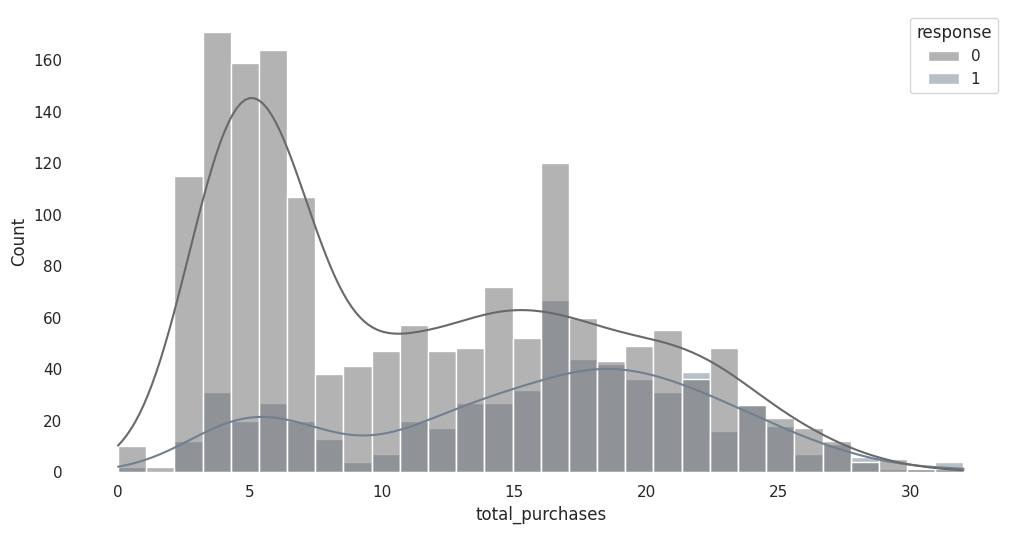

In [43]:
# total purchases histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='total_purchases',
    bins=30,
    kde=True,
    palette=['dimgrey', 'slategrey'],
    hue='response'
)
plt.box(False)

### Education
Regarding the education degree, we get that most of our data is represented by undergraduated customers.

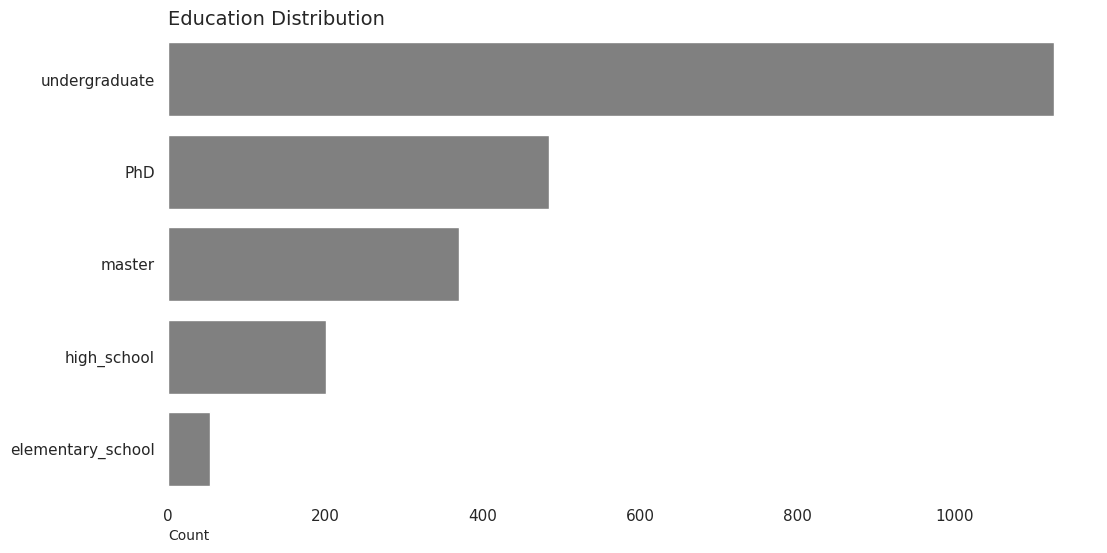

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='education',
    color='grey',
    orientation='horizontal'
)
plt.box(False)
plt.title('Education Distribution', loc='left', fontsize=14)
plt.xlabel('Count', loc='left', fontsize=10)
plt.ylabel('', fontsize=10)
plt.show();

We can consider the following educational level

- 1: Elementary or high school
- 2: Undergraduate
- 3: Master or PhD

to help us better understand the education analysis. In this manner, we separate customers between no graduation, graduation, and post-graduation. As such, a slightly degree of acceptance from the campaigns can be seen as the education level increases.

In [17]:
df['education_lvl'] = df['education'].map({
    'elementary_school': 1,
    'high_school': 1,
    'undergraduate': 2,
    'master': 3,
    'PhD': 3
})

df['education_lvl'].value_counts()

education_lvl
2    1126
3     855
1     255
Name: count, dtype: int64

#### Response Campaign per Education

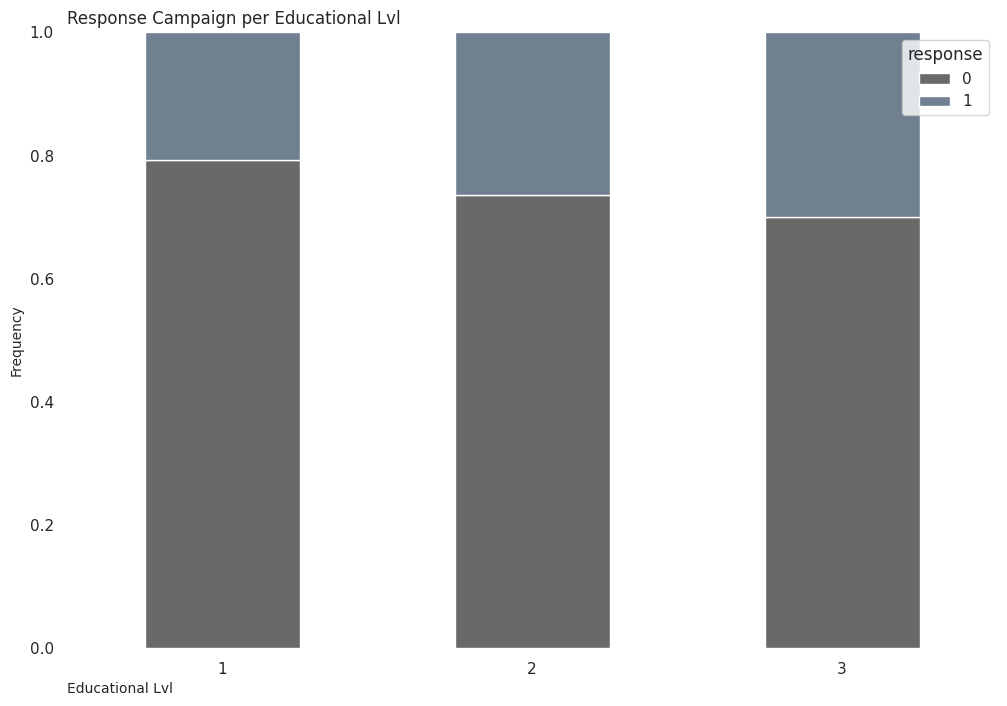

In [ ]:
aux = df.groupby('education_lvl')['response'].value_counts(normalize=True)
aux = aux.unstack()

aux.plot.bar(
    stacked=True,
    color=['dimgrey', 'slategrey'],
    figsize=(12, 8)
)
plt.box(False)
plt.ylim(0, 1)
plt.title('Response Campaign per Educational Lvl', loc='left', fontsize=12)
plt.xlabel('Educational Lvl', loc='left', fontsize=10)
plt.xticks(rotation=0)
plt.ylabel('Frequency', fontsize=10);

### Age
From the age distribution, we see a slightly better acceptance rate for older customers.

In [63]:
year = 2025
df['age'] = year - df['year_birth']

age_bins = [
    0, 40,
    60, 70,
    200
]

age_labels = [
    '0-40', '40-60',
    '60-70', '70+'
]

df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

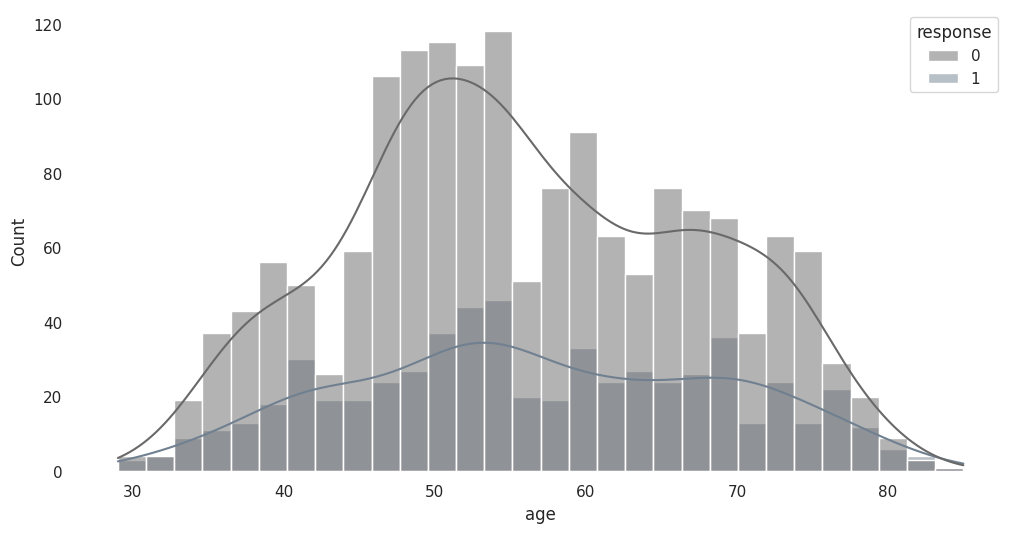

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='age',
    bins=30,
    kde=True,
    palette=['dimgrey', 'slategrey'],
    hue='response'
)
plt.box(False)

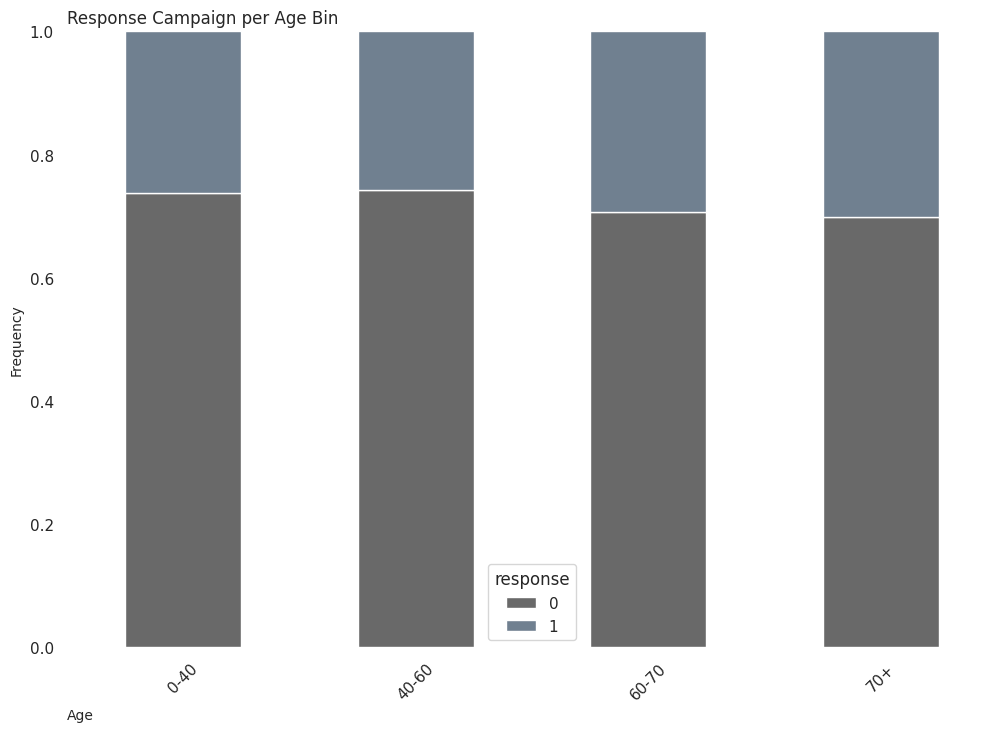

In [ ]:
aux = df.groupby('age_bin')['response'].value_counts(normalize=True)
aux = aux.unstack()

aux.plot.bar(
    stacked=True,
    color=['dimgrey', 'slategrey'],
    figsize=(12, 8)
)
plt.box(False)
plt.ylim(0, 1)
plt.title('Response Campaign per Age Bin', loc='left', fontsize=12)
plt.xlabel('Age', loc='left', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=10);

In [65]:
grp = df.groupby('age_bin')['total_expenditure'].mean().reset_index()
grp = grp.sort_values(by='age_bin', ascending=False)
grp

,age_bin,total_expenditure
3,70+,749.325949
2,60-70,684.079229
1,40-60,539.051948
0,0-40,609.149321


### Time as Client
From the sign up date, we can calculate, in years, the `years_as_client` feature and its bins. We observe a 30% acceptance rate in the highest bin.

In [18]:
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'])

In [19]:
df['years_as_client'] = (dt.today() - df['sign_up_date']).dt.days / 365

df['years_as_client'].describe()

count    2236.000000
mean       14.838824
std         3.928751
min        11.238356
25%        12.023973
50%        12.838356
75%        17.120548
max        24.704110
Name: years_as_client, dtype: float64

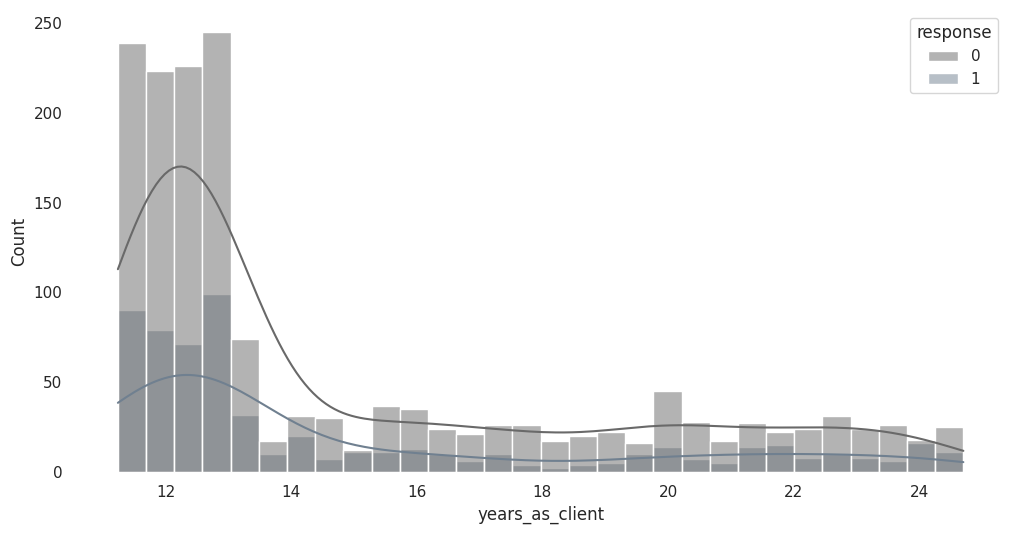

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='years_as_client',
    bins=30,
    kde=True,
    palette=['dimgrey', 'slategrey'],
    hue='response'
)
plt.box(False)

In [21]:
client_bin = [
    0, 12,
    15, 20,
    100
]

client_labels = [
    '0-12', '12-15',
    '15-20', '20+'
]

df['client_bin'] = pd.cut(
    df['years_as_client'],
    bins=client_bin,
    labels=client_labels
)

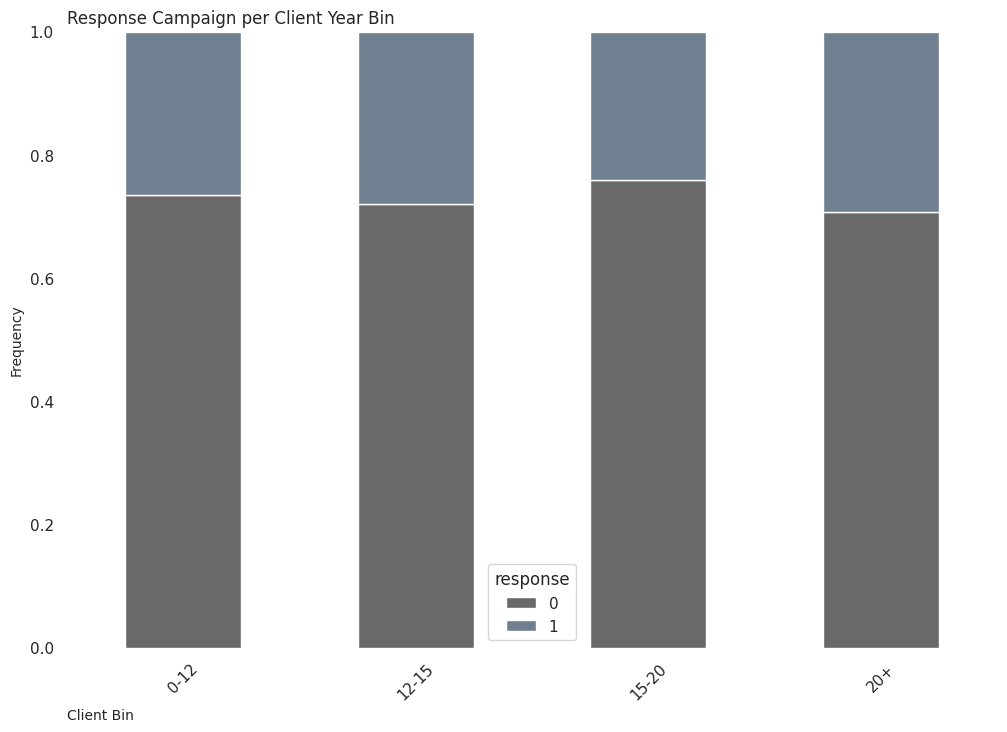

In [22]:
# response campaign per income bin
aux = df.groupby('client_bin')['response'].value_counts(normalize=True)
aux = aux.unstack()

aux.plot.bar(
    stacked=True,
    color=['dimgrey', 'slategrey'],
    figsize=(12, 8)
)
plt.box(False)
plt.ylim(0, 1)
plt.title('Response Campaign per Client Year Bin', loc='left', fontsize=12)
plt.xlabel('Client Bin', loc='left', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=10);

## Machine Learning - Feature Importance
We now fit a `RandomForestClassifier` to our data to evaluate feature importance and consider some business strategies to address them. We can further analyse the campaigns by educational degree and/or income bin, so as to improve its efficiency. One way to see this is to clusterize the customers into $n$ groups and perform $n$ campaigns, one specialized for each group. We leave this kind of treatment to another study.

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
n_cols = [
    'income',
    'kids_home',
    'teens_home',
    'total_expenditure',
    'total_purchases',
    'age',
    'years_as_client'
]

c_cols = [
    'education_lvl',
    'marital_status',
]

In [106]:
df_enc = df[n_cols + c_cols + ['response']].copy()

df_enc = pd.get_dummies(
    df_enc,
    columns=c_cols
)
df_enc.head()

,income,kids_home,teens_home,total_expenditure,total_purchases,age,years_as_client,response,education_lvl_1,education_lvl_2,education_lvl_3,marital_status_divorced,marital_status_married,marital_status_single,marital_status_widowed
0,55375.0,0,1,162,8,48,11.931507,0,False,True,False,False,True,False,False
1,77037.0,0,1,1123,26,65,11.942466,0,False,False,True,False,True,False,False
2,24163.0,1,1,17,4,55,14.778082,0,False,True,False,False,False,True,False
3,69476.0,0,0,1044,14,56,11.978082,0,False,False,True,False,True,False,False
4,72063.0,0,1,758,19,46,18.534247,0,False,True,False,False,True,False,False


In [ ]:
SEED = 1
rf = RandomForestClassifier(random_state=SEED)

X = df_enc.drop('response', axis=1).copy()
y = df_enc['response'].copy()


model = rf.fit(X, y)
importances = model.feature_importances_

importances = pd.Series(
    data=importances,
    index=X.columns
)

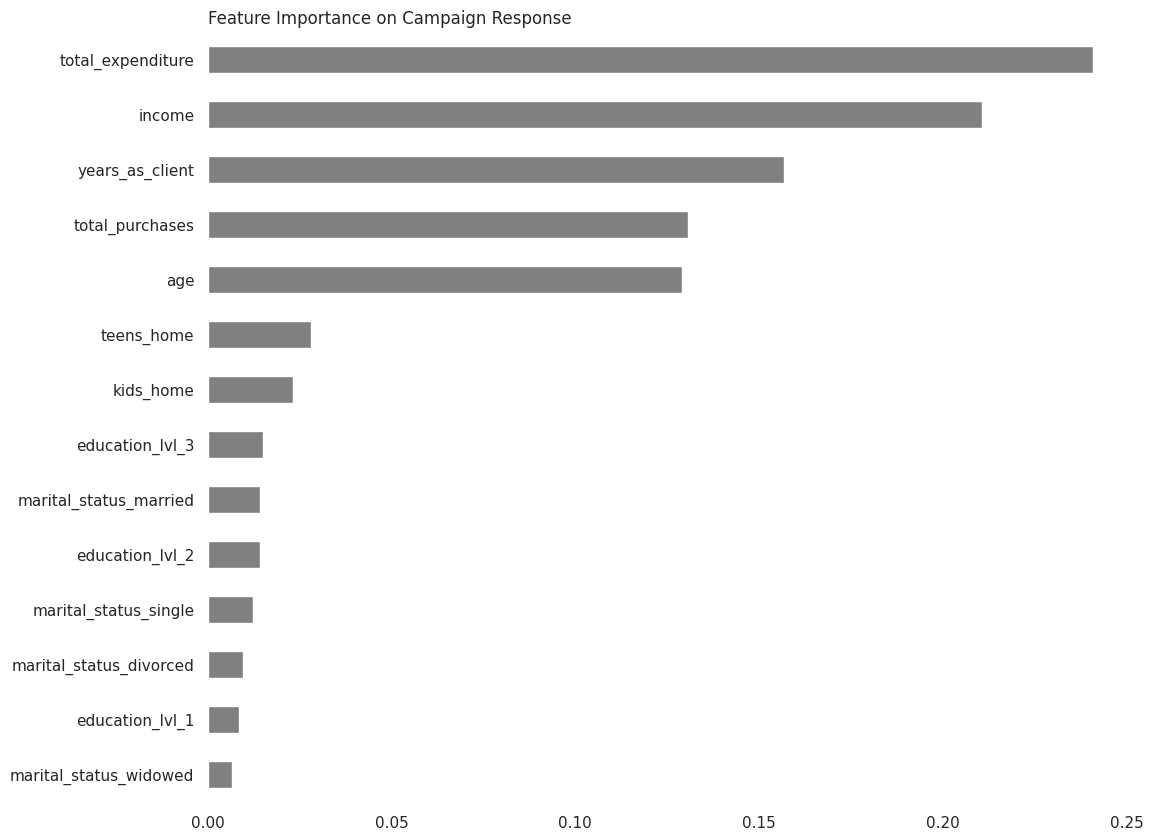

In [119]:
importances.sort_values(ascending=True).plot.barh(
    color='grey',
    figsize=(12, 10)
)
plt.title('Feature Importance on Campaign Response', loc='left', fontsize=12)
plt.box(False);

We thus observe that the five most importante features are:

1. Total Expenditure
2. Income
3. Years as Client
4. Total Purchases
5. Age

such that we can develop strategies aiming high income and long-term customers. We recommend improving the company's relationship with them, by prioritizing them in campaign targeting, offering high-value bundles and loyalty perks. Moreover, we can personalize offers by income group:

- higher income $\to$ premium product campaigns, with wine offers, for instance
- lower income $\to$ discount-based products or bundle deals;

and time as client:

- long-term customers: exclusive loyalty campaigns to reward relationship
- new customers: onboarding campaigns to build engagement

We can also consider purchase frequency and segment campaigns for frequent and infrequent buyers, and age-based campaigns, such as digital campaigns for younger customers and catalog/personalized calls for older customers.